<a href="https://colab.research.google.com/github/Fuad-Khan/Religious-Harassment-Models/blob/main/3_class_Hybrid_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN + LSTM Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115,715 (4.26 MB)

 Trainable params: 1,115,715 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - accuracy: 0.7221 - loss: 0.7376 - val_accuracy: 0.8599 - val_loss: 0.3601
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 60s 232ms/step - accuracy: 0.8732 - loss: 0.3125 - val_accuracy: 0.8686 - val_loss: 0.3363
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 54s 123ms/step - accuracy: 0.8928 - loss: 0.2539 - val_accuracy: 0.8582 - val_loss: 0.4159
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - accuracy: 0.9201 - loss: 0.2063 - val_accuracy: 0.8904 - val_loss: 0.4120
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 48s 147ms/step - accuracy: 0.9626 - loss: 0.1287 - val_accuracy: 0.9089 - val_loss: 0.3582
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step - accuracy: 0.9749 - loss: 0.0967 - val_accuracy: 0.9280 - val_loss: 0.3339
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 44s 133ms/step - accuracy: 0.9874 - loss: 0.0566 - val_accuracy: 0.9188 - val_loss: 0.3920
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.9932 - loss: 0

✅ Model saved as cnn_lstm_religious_comment_model.h5
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9170 - loss: 0.4429
Test Accuracy: 0.9217


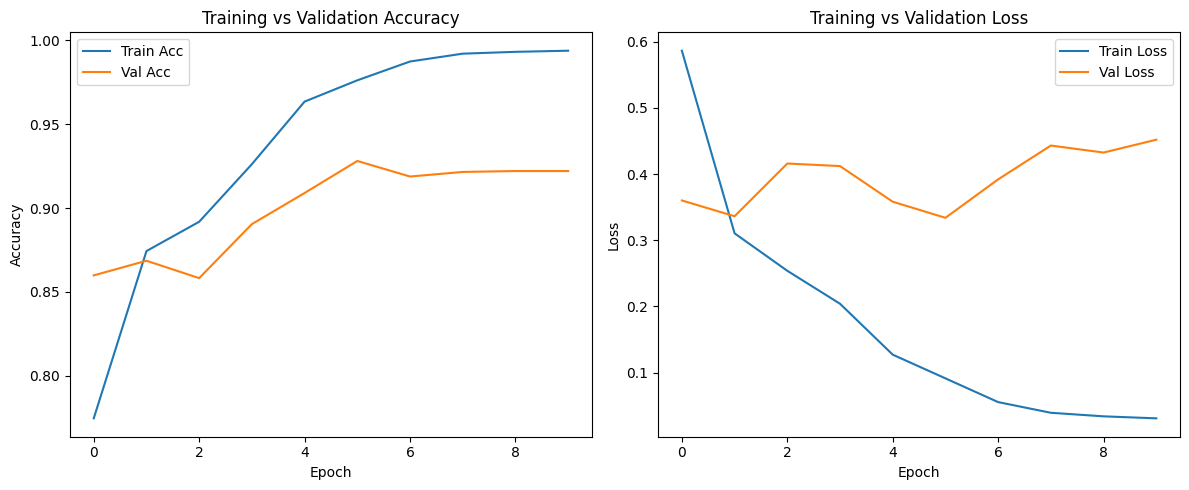

144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


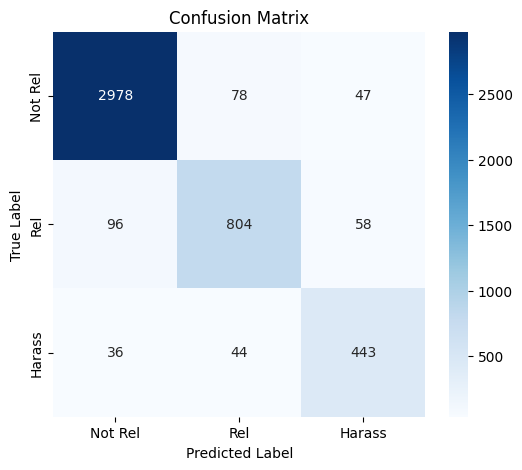


Classification Report:
                      precision    recall  f1-score   support

       Not Religious       0.96      0.96      0.96      3103
           Religious       0.87      0.84      0.85       958
Religious Harassment       0.81      0.85      0.83       523

            accuracy                           0.92      4584
           macro avg       0.88      0.88      0.88      4584
        weighted avg       0.92      0.92      0.92      4584



In [ ]:
# Step 1: Install TensorFlow (only on Google Colab)
# !pip install tensorflow scikit-learn matplotlib seaborn

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Step 3: Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# Step 4: Preprocess Text
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['comment'])
sequences = tokenizer.texts_to_sequences(df['comment'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 5: Encode Labels
labels = to_categorical(df['label_numeric'])

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# Step 7: Build CNN + LSTM Model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model before summary
model.build(input_shape=(None, max_len))
model.summary()

# Step 8: Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Step 9: Save the Model
model.save("cnn_lstm_religious_comment_model.h5")
print("✅ Model saved as cnn_lstm_religious_comment_model.h5")

# Step 10: Evaluate on Test Set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Step 11: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Step 12: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Rel", "Rel", "Harass"], yticklabels=["Not Rel", "Rel", "Harass"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Not Religious", "Religious", "Religious Harassment"]))


# BiLSTM + Attention + FastText

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 300)       │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_1 (Attention)         │ (None, 128)            │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,195,559 (23.63 MB)

 Trainable params: 195,559 (763.90 KB)

 Non-trainable params: 6,000,000 (22.89 MB)

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 78s 254ms/step - accuracy: 0.7377 - loss: 0.7205 - val_accuracy: 0.8146 - val_loss: 0.4978
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 82s 255ms/step - accuracy: 0.8132 - loss: 0.4965 - val_accuracy: 0.8255 - val_loss: 0.4631
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 88s 277ms/step - accuracy: 0.8359 - loss: 0.4429 - val_accuracy: 0.8399 - val_loss: 0.4097
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 74s 258ms/step - accuracy: 0.8454 - loss: 0.4048 - val_accuracy: 0.8532 - val_loss: 0.3837
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 85s 270ms/step - accuracy: 0.8516 - loss: 0.3829 - val_accuracy: 0.8567 - val_loss: 0.3784
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 78s 254ms/step - accuracy: 0.8557 - loss: 0.3752 - val_accuracy: 0.8560 - val_loss: 0.3752
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 77s 269ms/step - accuracy: 0.8677 - loss: 0.3429 - val_accuracy: 0.8678 - val_loss: 0.3446
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 82s 270ms/step - accuracy: 0.8736 - loss: 0

144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step


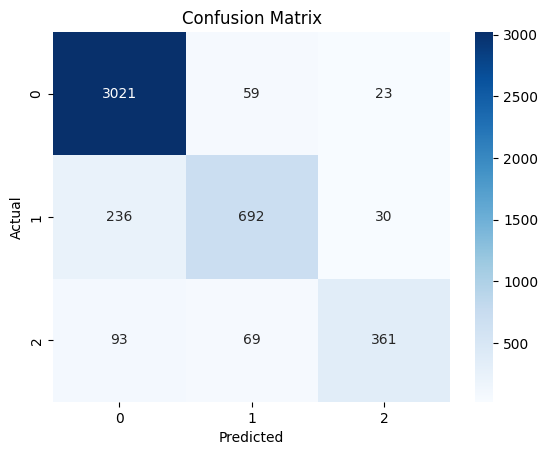

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3103
           1       0.84      0.72      0.78       958
           2       0.87      0.69      0.77       523

    accuracy                           0.89      4584
   macro avg       0.87      0.80      0.83      4584
weighted avg       0.89      0.89      0.88      4584



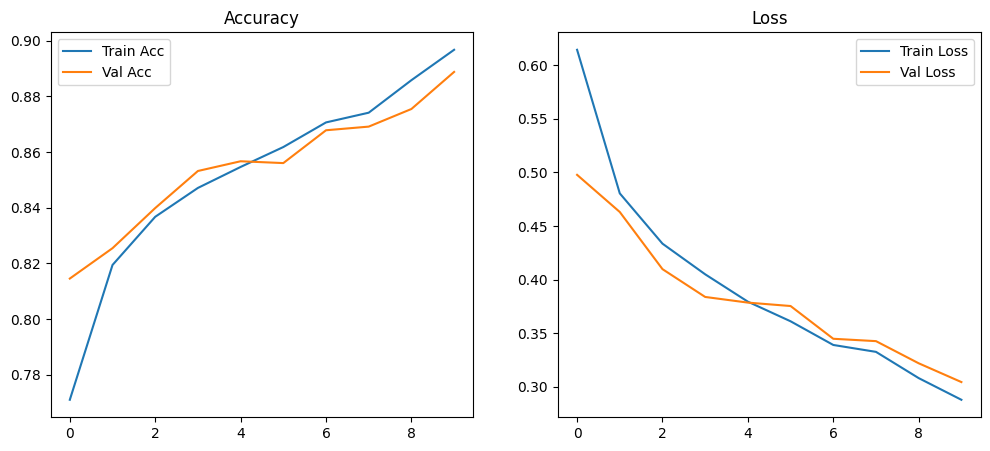

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Layer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import tensorflow as tf
import gzip
import requests

# Download FastText embeddings
url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz"
filename = "cc.bn.300.vec.gz"
response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

# Define Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)  # Energy scores
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)                   # Attention weights
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha                    # Weighted sum of hidden states
        context = K.sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Load Data
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)
df.dropna(subset=['comment', 'label_numeric'], inplace=True)

texts = df['comment'].astype(str).tolist()
labels = df['label_numeric'].tolist()

# Label Encoding
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels), num_classes=3)

# Tokenize
max_words = 20000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=max_len)

# Load FastText embeddings from gz file
embedding_index = {}
with gzip.open(filename, 'rt', encoding='utf8') as f:
    next(f)  # Skip header
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare embedding matrix
embedding_dim = 300
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build Model
input_ = Input(shape=(max_len,))
embedding = Embedding(input_dim=num_words,
                      output_dim=embedding_dim,
                      weights=[embedding_matrix],
                      input_length=max_len,
                      trainable=False)(input_)
bilstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)
attention = Attention()(bilstm)
drop = Dropout(0.5)(attention)
dense = Dense(64, activation='relu')(drop)
output = Dense(3, activation='softmax')(dense)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Save Model
model.save("bilstm_attention_fasttext_bangla.h5")

# Evaluation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(cls) for cls in le.classes_],
            yticklabels=[str(cls) for cls in le.classes_])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Fix: Convert class labels to strings
target_names = [str(cls) for cls in le.classes_]
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


# CNN + LSTM + GlobalAveragePooling Model

✅ Found embeddings for 11059 out of 42860 tokens.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 300)       │     3,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 48, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,443 (14.24 MB)

 Trainable params: 133,443 (521.26 KB)

 Non-trainable params: 3,600,000 (13.73 MB)

Epoch 1/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.6380 - loss: 0.9415 - val_accuracy: 0.7857 - val_loss: 0.5936
Epoch 2/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 27s 209ms/step - accuracy: 0.7520 - loss: 0.6780 - val_accuracy: 0.7803 - val_loss: 0.5410
Epoch 3/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - accuracy: 0.8028 - loss: 0.5186 - val_accuracy: 0.8015 - val_loss: 0.5041
Epoch 4/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.8398 - loss: 0.4195 - val_accuracy: 0.8135 - val_loss: 0.4584
Epoch 5/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 28s 221ms/step - accuracy: 0.8691 - loss: 0.3569 - val_accuracy: 0.7923 - val_loss: 0.5139
Epoch 6/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.8956 - loss: 0.2810 - val_accuracy: 0.8250 - val_loss: 0.4628
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.90      3103
           1       0.81      0.58      0.6

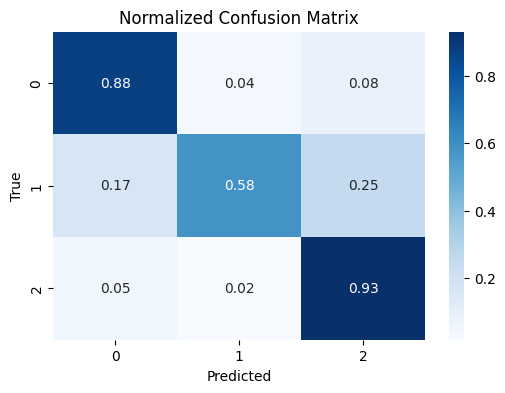

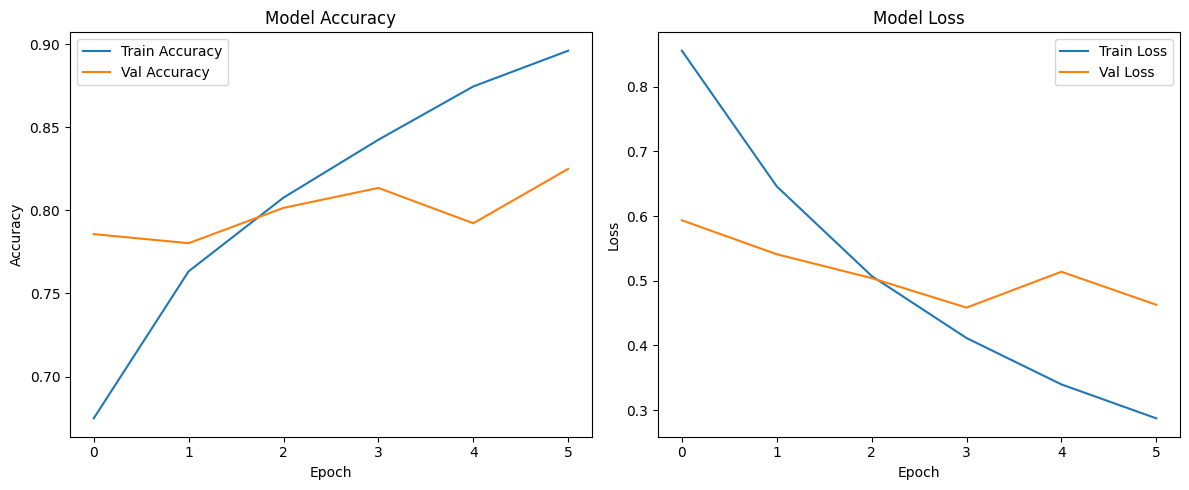


✅ Model and tokenizer saved in `.keras` and `.pkl` formats.


In [ ]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, MaxPooling1D,
                                     LSTM, Dense, Dropout, GlobalAveragePooling1D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# STEP 2: Load CSV file
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# STEP 3: Prepare data (MULTICLASS VERSION)
texts = df['comment'].astype(str).values
labels = df['label_numeric'].astype(int).values
num_classes = len(np.unique(labels))

# STEP 4: Tokenization & Padding
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# STEP 5: Load FastText Bangla Embeddings
!wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz

embedding_index = {}
with gzip.open('cc.bn.300.vec.gz', 'rt', encoding='utf-8', newline='\n', errors='ignore') as f:
    next(f)
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 300
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

found = 0
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            found += 1

print(f"✅ Found embeddings for {found} out of {len(word_index)} tokens.")

# STEP 6: Train/Test/Validation Split
X_train_full, X_test, y_train_full, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# STEP 7: Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# STEP 8: Build the Model
inputs = Input(shape=(max_length,))
x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = LSTM(64, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# STEP 9: Train the Model
callbacks = [
    EarlyStopping(patience=2, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=128,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
)

# STEP 10: Evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix (Normalized)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm / cm.sum(axis=1, keepdims=True), annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# STEP 11: Plot Training History
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# STEP 12: Save Model and Tokenizer
model.save("bangla_multi_model.keras")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("\n✅ Model and tokenizer saved in `.keras` and `.pkl` formats.")


# BanglaBERT + CNN + LSTM

In [ ]:
# Step 1: Install required libraries
# !pip install transformers
# !pip install tensorflow scikit-learn matplotlib seaborn

from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

comments = df['comment'].astype(str).tolist()
labels = df['label_numeric'].values

# Step 3: Load BanglaBERT Tokenizer and Model

model_name = "csebuetnlp/banglabert"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load BanglaBERT (from PyTorch weights)
banglabert = TFAutoModel.from_pretrained(model_name, from_pt=True)

# Step 4: Tokenize and Prepare Input
tokens = tokenizer(
    comments,
    padding=True,
    truncation=True,
    max_length=100,
    return_tensors='tf'
)

# Get BERT embeddings (CLS token representation)
bert_outputs = banglabert(**tokens)
X = bert_outputs.last_hidden_state[:, 0, :].numpy()  # shape = (num_samples, 768)

# One-hot encode labels (3 classes)
y = tf.keras.utils.to_categorical(labels, num_classes=3)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build CNN + LSTM on top of BanglaBERT embeddings
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((24, 32), input_shape=(768,)))  # reshape to 2D input
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 8: Save the Model
model.save("banglabert_cnn_lstm_model.h5")
print("✅ Model saved as banglabert_cnn_lstm_model.h5")

# Step 9: Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.tight_layout()
plt.show()

# Step 10: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Religious", "Religious", "Harassment"],
            yticklabels=["Not Religious", "Religious", "Harassment"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Not Religious", "Religious", "Harassment"]))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'electra.embeddings.position_ids', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertFo